In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [23]:
data = pd.read_csv("GoldPrice(2013-2023).csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [24]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data = data.sort_values('Date')
data['Price'] = data['Price'].replace(',', '', regex=True).astype(float)
data = data.set_index('Date')

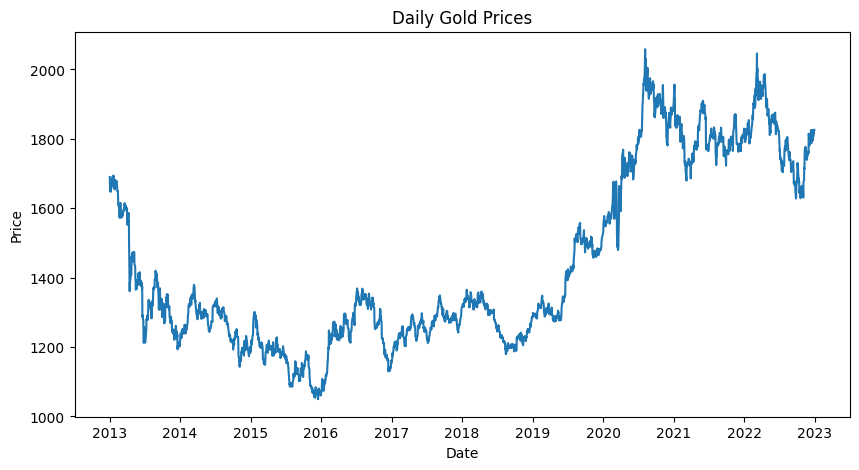

In [41]:
# Plotting Gold Prices
plt.figure(figsize=(10,5))
plt.plot(data['Price'])
plt.title("Daily Gold Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

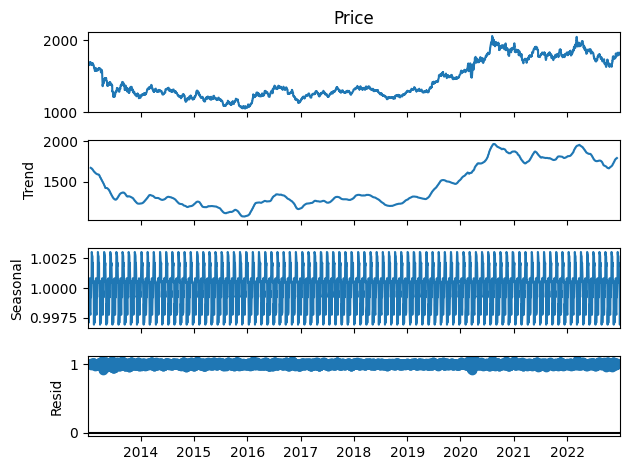

In [26]:
# Seasonal Decomposition
decompose = seasonal_decompose(data['Price'], model='multiplicative', period=30)
decompose.plot()
plt.show()

In [ ]:
split_point = int(len(data) * 0.8)
train = data.iloc[:split_point]
test = data.iloc[split_point:]

In [ ]:
hwmodel = ExponentialSmoothing(
    train["Price"],
    trend="add",
    seasonal="mul",
    seasonal_periods=12
).fit()

c:\Users\admin\.conda\envs\DL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
test_pred = hwmodel.forecast(len(test))
test_pred.index = test.index

c:\Users\admin\.conda\envs\DL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\admin\.conda\envs\DL\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


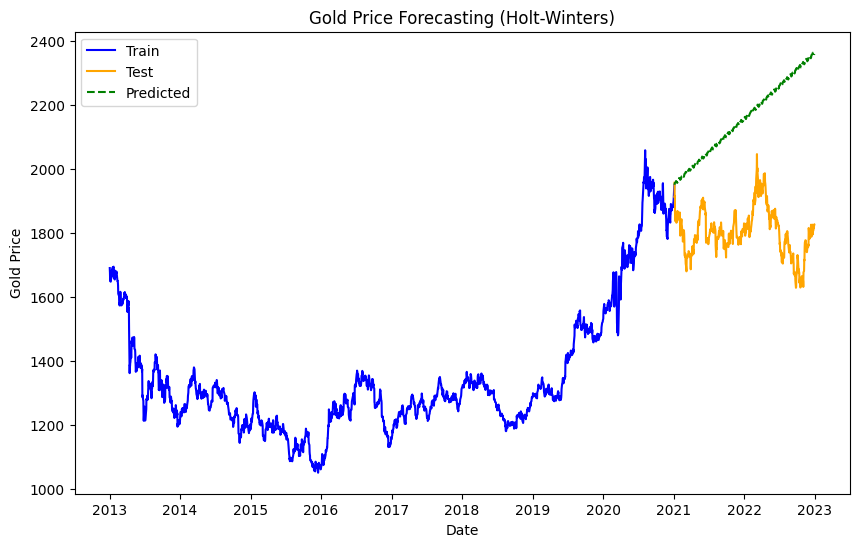

In [40]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train["Price"], label="Train", color="blue")
plt.plot(test.index, test["Price"], label="Test", color="orange")
plt.plot(test_pred.index, test_pred, label="Predicted", color="green", linestyle="--")
plt.title("Gold Price Forecasting (Holt-Winters)")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(test["Price"], test_pred))
print("RMSE:", round(rmse, 2))

RMSE: 386.74
